In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Data Analyst - Test Data - US.csv')

In [3]:
df.head()

,Review,date,Location
0,I was very impressed with the resort.\r\n Grea...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor


In [4]:
df.describe()

,Review,date,Location
count,6393,6448,1711
unique,6384,403,1082
top,Amazing\r\n \r\n \r\n,Jun 2019,United States of America
freq,4,145,116


In [5]:
df.isnull().sum()

Review        55
date           0
Location    4737
dtype: int64

In [6]:
df['Location'].fillna('Unknown', inplace=True)

In [7]:
df.isnull().sum()

Review      55
date         0
Location     0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Review      0
date        0
Location    0
dtype: int64

In [10]:
df.dtypes

Review      object
date        object
Location    object
dtype: object

In [15]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [16]:
df.isnull().sum()

Review        0
date        649
Location      0
dtype: int64

In [17]:
df.shape

(6393, 3)

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

Review      0
date        0
Location    0
dtype: int64

In [20]:
df['date'] = pd.to_datetime(df['date'])

In [21]:
df.dtypes

Review              object
date        datetime64[ns]
Location            object
dtype: object

In [29]:
reviews_by_date = df['date'].value_counts()
reviews_by_date

date
2018-12-01    66
2019-03-01    64
2019-02-01    58
2018-09-01    49
2019-01-01    44
              ..
2019-02-14     3
2019-06-14     3
2019-05-31     2
2019-06-06     2
2019-06-08     2
Name: count, Length: 385, dtype: int64

In [26]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [31]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(review):
    return TextBlob(review).sentiment.polarity
    
df['Sentiment'] = df['Review'].apply(get_sentiment)

df

,Review,date,Location,Sentiment
0,I was very impressed with the resort.\r\n Grea...,2019-08-20,Sebastian,0.514286
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,0.250000
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,0.378788
3,The hotel was adequate for my stay. The strips...,2019-08-20,Unknown,0.102222
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,0.404524
...,...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America,0.199008
6444,·the internet barely worked or didn't work,2019-07-12,United States of America,0.050000
6445,·the location was great.\r\n \r\n \r\n \r\n \r...,2019-07-10,United States of America,0.266667
6446,·we were early for check in and the staff was ...,2019-07-10,United States of America,0.200000


In [33]:
df[df.Sentiment==1]

,Review,date,Location,Sentiment
287,Great Location! Walking distance to Disney Spr...,2019-07-24,Puerto Rico,1.0
756,"Beautiful!! Immaculate !! Convenient, Close to...",2019-06-04,Weston,1.0
1029,I like the convenience to my work and your sta...,2019-05-12,Unknown,1.0
1130,Perfect\r\n \r\n \r\n,2019-05-05,Unknown,1.0
1238,The room is compact. Practical and in excellen...,2019-04-28,Unknown,1.0
...,...,...,...,...
5182,This place was everything I thought it would b...,2018-08-15,Philadelphia,1.0
5252,Amazing!!! \r\n \r\n \r\n,2018-08-12,Unknown,1.0
5267,Hotel staff are wonderful and helpful.\r\n \r...,2018-08-10,Unknown,1.0
6411,·bed was great!\r\n \r\n \r\n \r\n \r\n ·one o...,2019-07-19,United States of America,1.0


In [34]:
from wordcloud import WordCloud , STOPWORDS

In [35]:
positive_comments=df[df.Sentiment==1].Review

In [39]:
total_positive_comments=' '.join(positive_comments)

In [40]:
wordcloud1=WordCloud(stopwords=set(STOPWORDS)).generate(total_positive_comments)

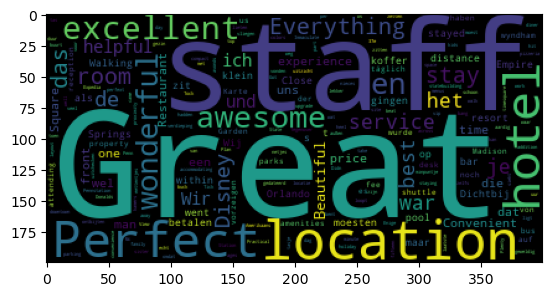

In [41]:
plt.imshow(wordcloud1)

In [43]:
negative_comments=df[df.Sentiment==-1].Review
total_negative_comments=' '.join(positive_comments)

In [44]:
wordcloud2=WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_comments)

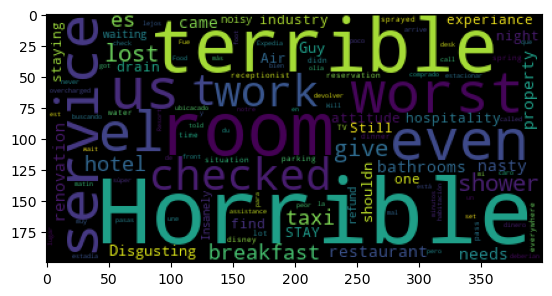

In [45]:
plt.imshow(wordcloud2)

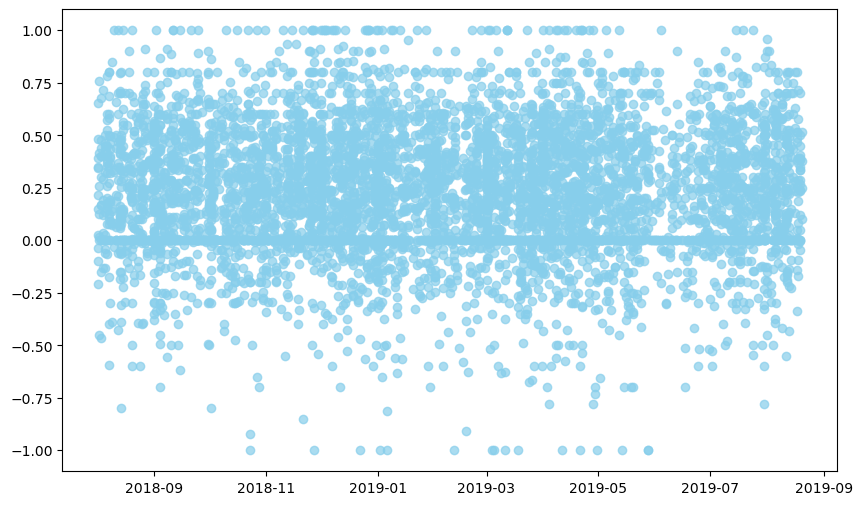

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(df['date'], df['Sentiment'], color='skyblue', alpha=0.7)

plt.show()

In [56]:
grouped_df = df.groupby('Location').agg(
    Average_Sentiment=('Sentiment', 'mean'),
    Review_Count=('Review', 'count')
).reset_index()


grouped_df.sort_values(by='Average_Sentiment', ascending=False, inplace=True)

grouped_df

,Location,Average_Sentiment,Review_Count
979,Weston,1.000,1
354,Ireland,1.000,1
750,"SF, CA",1.000,1
92,"Brewster, NY",1.000,1
868,"Sunrise, FL",1.000,1
...,...,...,...
514,Modesto ca,-0.675,1
925,Ulm,-0.700,1
154,China,-0.780,1
1071,us,-1.000,1


In [57]:
grouped_df

,Location,Average_Sentiment,Review_Count
979,Weston,1.000,1
354,Ireland,1.000,1
750,"SF, CA",1.000,1
92,"Brewster, NY",1.000,1
868,"Sunrise, FL",1.000,1
...,...,...,...
514,Modesto ca,-0.675,1
925,Ulm,-0.700,1
154,China,-0.780,1
1071,us,-1.000,1


In [59]:
grouped_df[grouped_df.Review_Count>4]

,Location,Average_Sentiment,Review_Count
751,Sacramento,0.436464,6
880,Tampa,0.398741,6
892,Texas,0.387080,5
149,Chicago,0.376675,11
519,Montreal,0.371285,5
355,Irvine,0.370764,6
363,Jacksonville,0.369361,5
902,Toronto,0.369123,12
964,"Washington, DC",0.300404,7
811,"Seattle, WA",0.278016,5
